# Transfer function between two time series with different FFT averaging methods

Authors: Artem Basalaev <artemDOTbasalaev@pmDOTme>

For details of averaging methods, see [spicypy/examples/compare_averaging_methods](https://pyda-group.gitlab.io/spicypy/examples/compare_averaging_methods.html)

 If not done already, install spicypy (uncomment the line below):

In [1]:
#pip install spicypy

## Estimating transfer function

In [2]:
from spicypy.signal.time_series import TimeSeries
import numpy as np
import matplotlib.pyplot as plt
from spicypy.signal.transfer_function import TransferFunction

Create some random time series

L1:TS-A


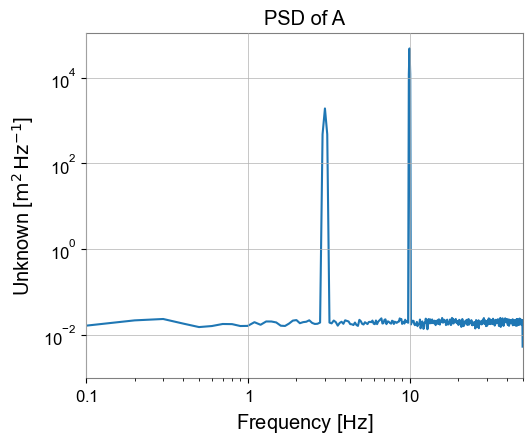

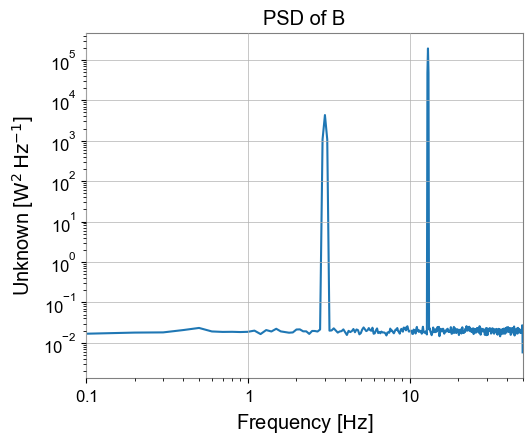

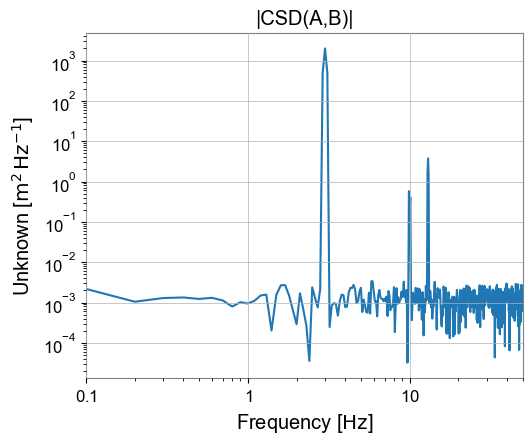

In [3]:
# define two waves, each with two frequencies, one of which is the same (f1)
n = 100000
f1 = 3
f2 = 10
f3 = 13
sample_rate = 100
t = np.arange(n)/sample_rate
a = 20 * np.sin(2 * np.pi * f1 * t) + 100 * np.sin(2 * np.pi * f2 * t)
b = 30 * np.sin(2 * np.pi * f1 * t) + 200 * np.sin(2 * np.pi * f3 * t)

#add some random noise
noise_a = np.random.standard_normal(n)
noise_b = np.random.standard_normal(n)

#create time series
A = TimeSeries(a+noise_a, times=t, name = 'Timeseries A', channel = 'L1:TS-A', unit='meter')
B = TimeSeries(b+noise_b, times=t, name = 'Timeseries B', channel = 'L1:TS-B', unit='watt')

#plot respective PSDs and CSD
_ = A.psd(fftlength=10).plot(title="PSD of A") # NOTE: fftlength is explicitly specified. Otherwise defaults to a single FFT covering full duration
_ = B.psd(fftlength=10).plot(title="PSD of B")
_ = np.abs(A.csd(B, fftlength=10)).plot(title="|CSD(A,B)|")
print (A.csd(B, fftlength=10).channel)

Estimate and plot transfer function (default averaging method: Welch)

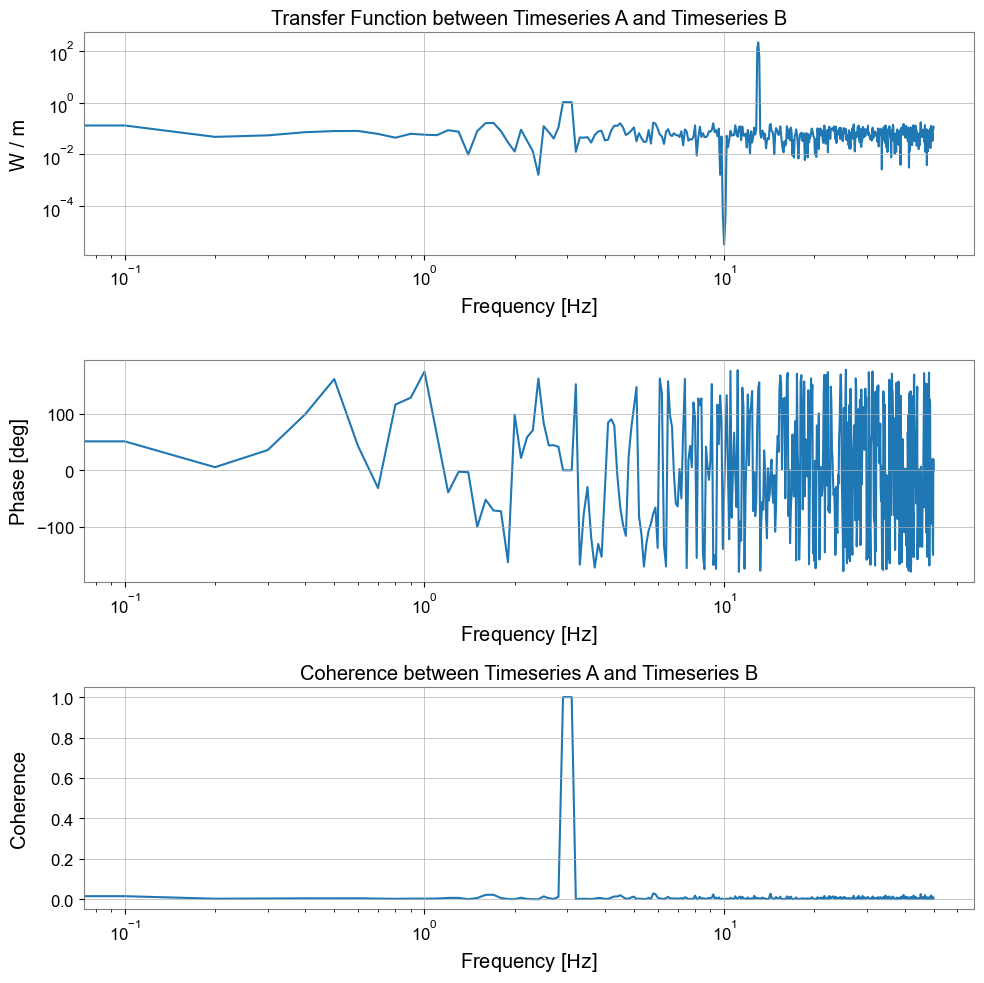

In [4]:
tf = TransferFunction(A,B, fftlength=10) # NOTE: fftlength is explicitly specified. Otherwise defaults to a single FFT covering full duration
_ = tf.plot(coherence = True)

One can also create a transfer function object from already existing frequency series:

In [5]:
tf2 = TransferFunction(tf=tf.tf)

## Transfer function with other averaging methods

First PSDs and CSD:

Text(0, 0.5, 'm^2/Hz')

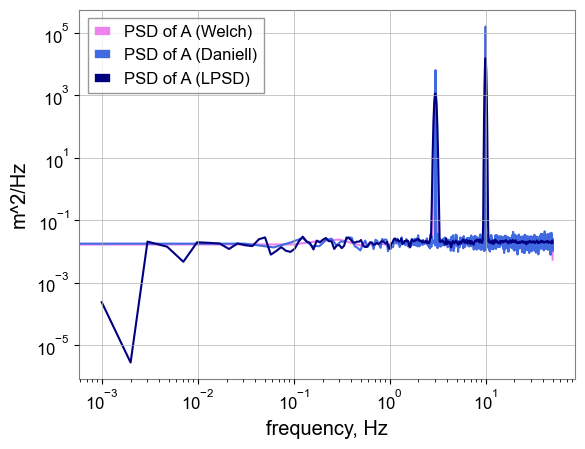

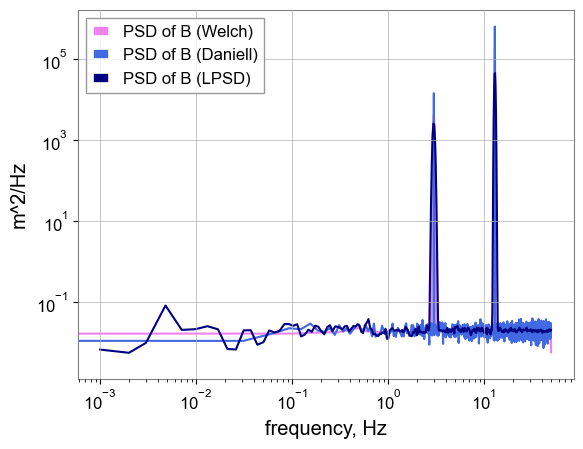

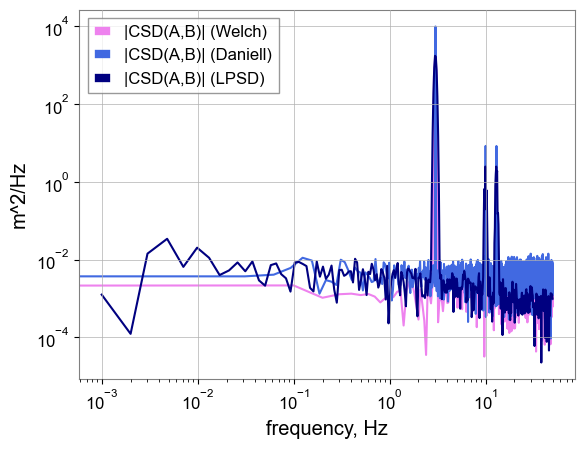

In [6]:
plt.figure()
plt.plot(A.psd(fftlength=10), label='PSD of A (Welch)', color='violet')
plt.plot(A.psd(method = 'daniell', number_averages=31), label='PSD of A (Daniell)', color='royalblue')
plt.plot(A.psd(method = 'lpsd'), label='PSD of A (LPSD)', color='navy')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('frequency, Hz')
plt.ylabel('m^2/Hz')

plt.figure()
plt.plot(B.psd(fftlength=10), label='PSD of B (Welch)', color='violet')
plt.plot(B.psd(method = 'daniell', number_averages=31), label='PSD of B (Daniell)', color='royalblue')
plt.plot(B.psd(method = 'lpsd'), label='PSD of B (LPSD)', color='navy')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('frequency, Hz')
plt.ylabel('m^2/Hz')

plt.figure()
plt.plot(np.abs(A.csd(B,fftlength=10)), label='|CSD(A,B)| (Welch)', color='violet')
plt.plot(np.abs(A.csd(B,method = 'daniell', number_averages=31)), label='|CSD(A,B)| (Daniell)', color='royalblue')
plt.plot(np.abs(A.csd(B,method = 'lpsd')), label='|CSD(A,B)| (LPSD)', color='navy')
plt.legend(loc='upper left')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('frequency, Hz')
plt.ylabel('m^2/Hz')

Transfer function with Daniell method:

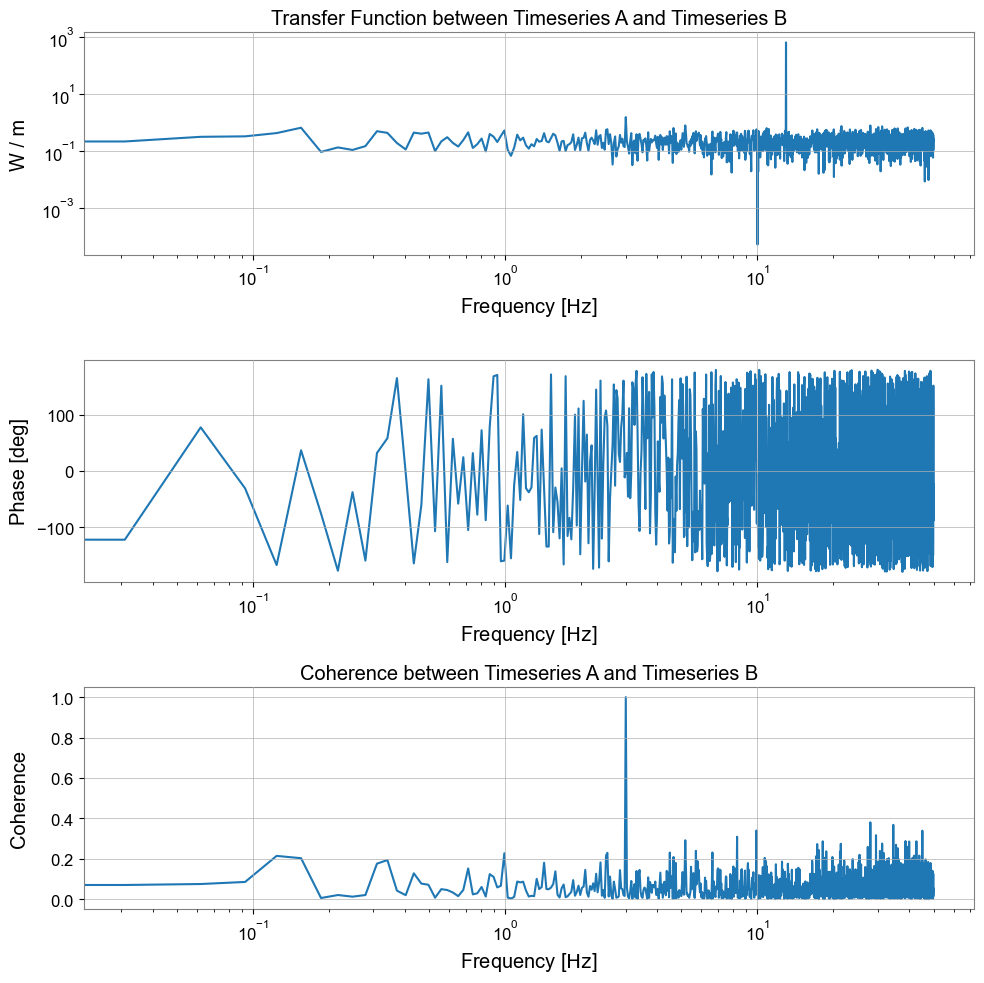

In [7]:
tf = TransferFunction(A,B, method='daniell', number_averages=31)
_ = tf.plot(coherence=True)

Transfer function with LPSD method:

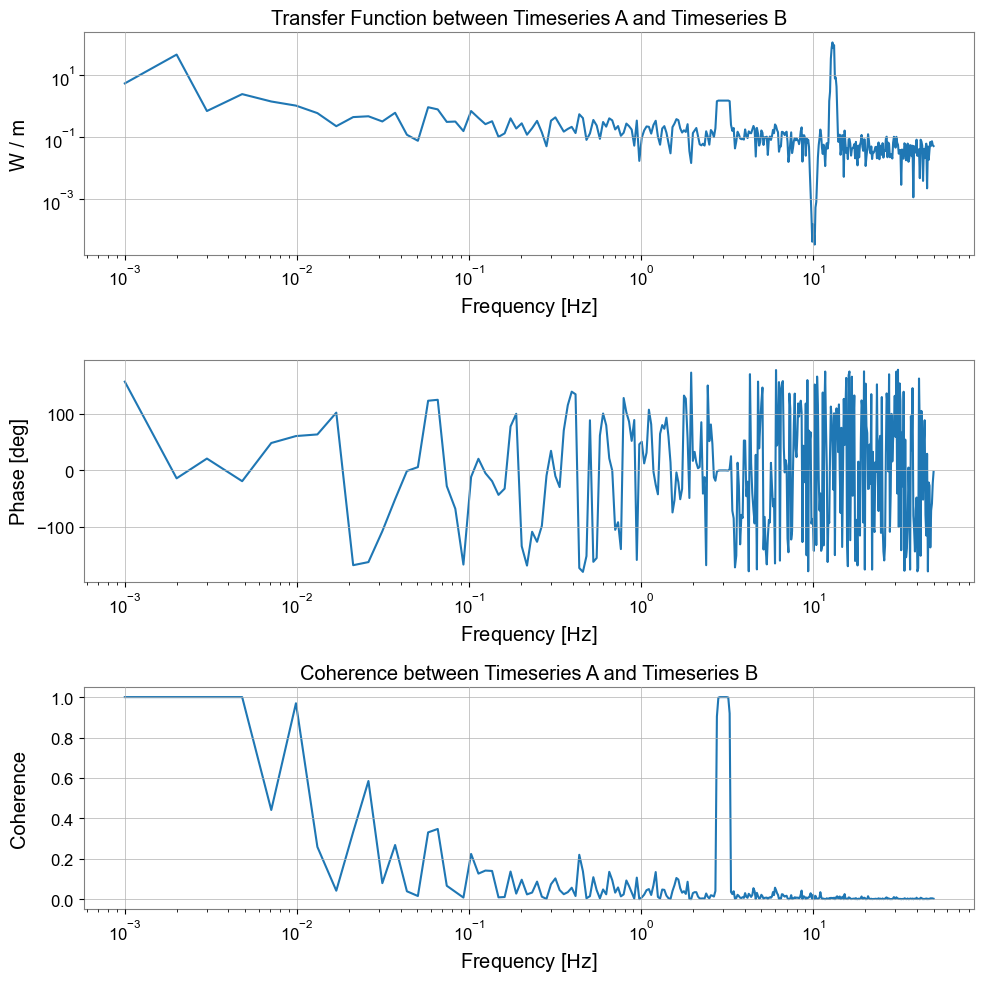

In [8]:
tf = TransferFunction(A,B, method='lpsd')
_ = tf.plot(coherence=True)